In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
original_data = pd.read_csv('Component_failure_prediction.csv')

In [3]:
df1=original_data.copy()

In [4]:
df1

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [5]:
df1= df1.drop(['UDI','Product ID'], axis=1)

In [6]:
df1

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [7]:
dict1={'Air temperature [K]':'air_temp','Process temperature [K]':'process_temp','Rotational speed [rpm]':'speed',
      'Torque [Nm]':'torque','Tool wear [min]':'tool_wear'}
df1 = df1.rename(columns=dict1)

In [8]:
df1

,Type,air_temp,process_temp,speed,torque,tool_wear,Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [9]:
df1.describe()

,air_temp,process_temp,speed,torque,tool_wear,Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [10]:
# there are outliers in speed and torque columns

In [11]:
df1.isnull().sum()

Type            0
air_temp        0
process_temp    0
speed           0
torque          0
tool_wear       0
Target          0
Failure Type    0
dtype: int64

In [12]:
df1_failure=df1[df1['Target']==0]

In [13]:
df1_failure['Failure Type'].value_counts()

No Failure         9643
Random Failures      18
Name: Failure Type, dtype: int64

In [14]:
# No failure has 18 cases of random failure, so we need to delete these cases

In [15]:
possible_failure_index = df1[(df1['Target']==0)&(df1['Failure Type']=='Random Failures')].index

In [16]:
df1=df1.drop(possible_failure_index, axis=0).reset_index(drop=True)

In [17]:
df1

,Type,air_temp,process_temp,speed,torque,tool_wear,Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9977,M,298.8,308.4,1604,29.5,14,0,No Failure
9978,H,298.9,308.4,1632,31.8,17,0,No Failure
9979,M,299.0,308.6,1645,33.4,22,0,No Failure
9980,H,299.0,308.7,1408,48.5,25,0,No Failure


In [18]:
df1_nofailure=df1[df1['Target']==1]

In [19]:
df1_nofailure['Failure Type'].value_counts()

Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: Failure Type, dtype: int64

In [20]:
# Failure cases has 9 cases of No failure, need to remove these cases.

In [21]:
possible_failure_index = df1[(df1['Target']==1)&(df1['Failure Type']=='No Failure')].index

In [22]:
df1=df1.drop(possible_failure_index, axis=0).reset_index(drop=True)

In [23]:
df1

,Type,air_temp,process_temp,speed,torque,tool_wear,Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9968,M,298.8,308.4,1604,29.5,14,0,No Failure
9969,H,298.9,308.4,1632,31.8,17,0,No Failure
9970,M,299.0,308.6,1645,33.4,22,0,No Failure
9971,H,299.0,308.7,1408,48.5,25,0,No Failure


In [24]:
df1.shape

(9973, 8)

In [25]:
df1_corr=df1.drop(['Type','Failure Type'],axis=1)

<AxesSubplot:>

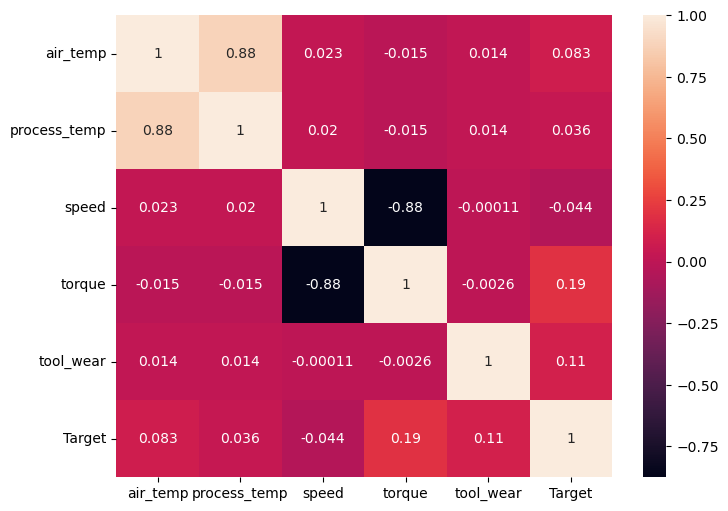

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df1_corr.corr(),annot=True)

In [27]:
# torque and speed has strong negative correlation, we have very less features so keeping both of them.  

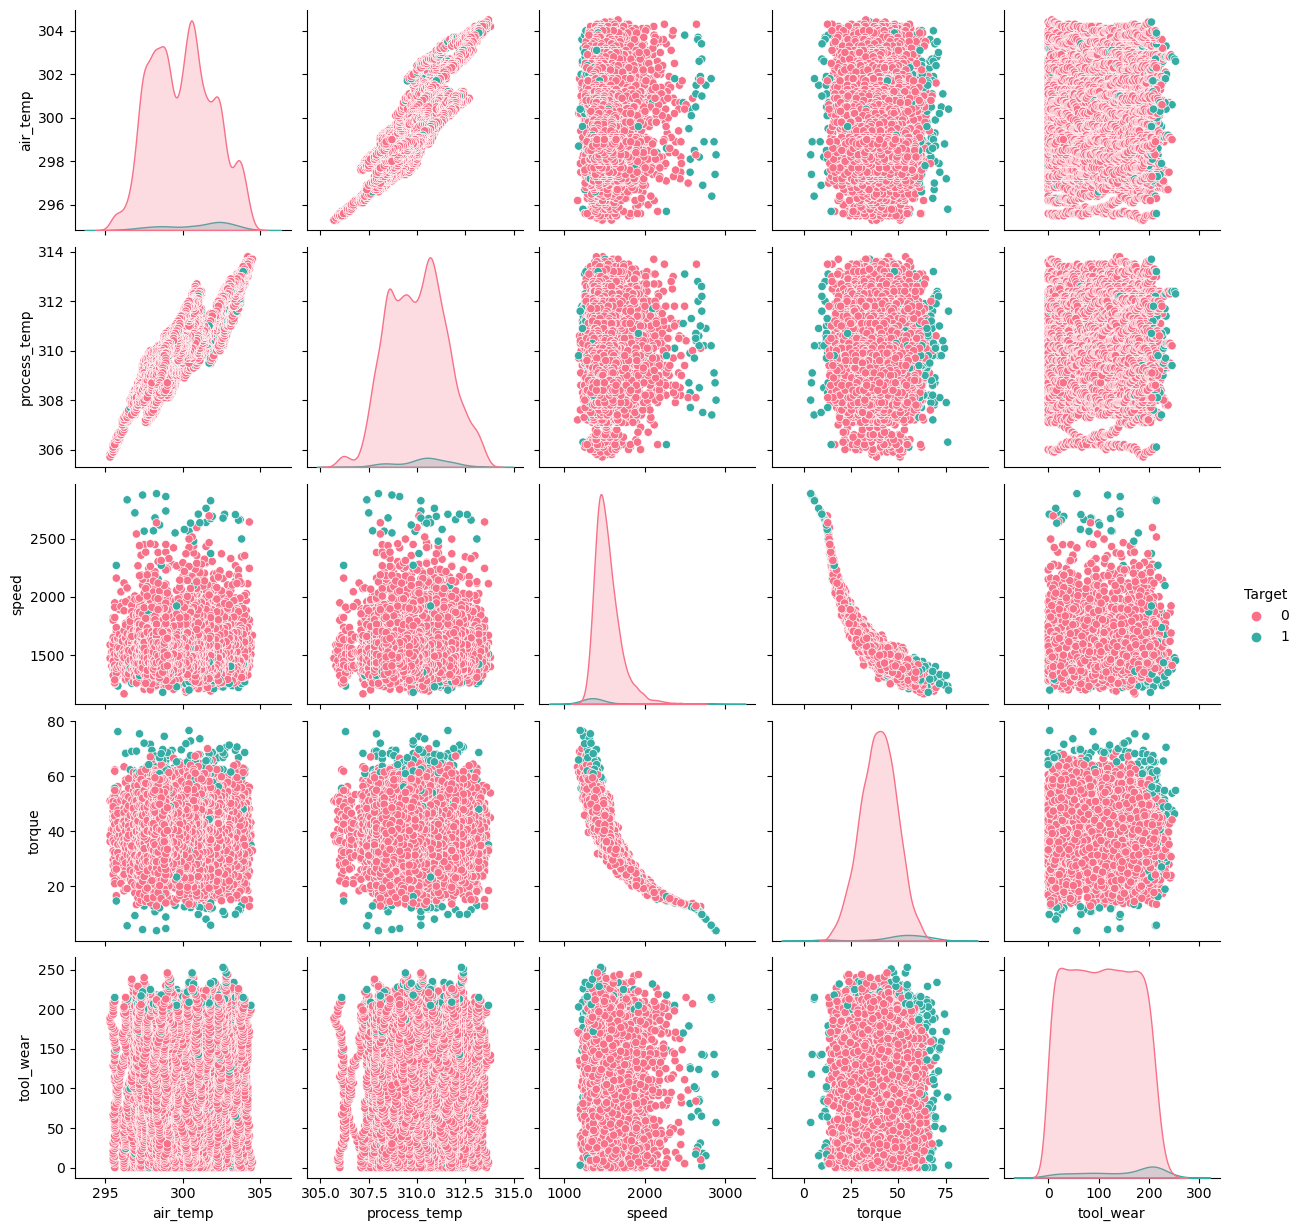

In [28]:
sns.pairplot(df1,hue="Target",palette="husl")

In [29]:
""" Torque and Rotational speed are highly correlated. Linear but negative.
Process temp and Air Temp highly positive linear relation.
Failure occur at extreme high & extreme low value of Torque and rotational speed
"""

' Torque and Rotational speed are highly correlated. Linear but negative.\nProcess temp and Air Temp highly positive linear relation.\nFailure occur at extreme high & extreme low value of Torque and rotational speed\n'

In [30]:
# Lets see the percentage of failure using pie plot

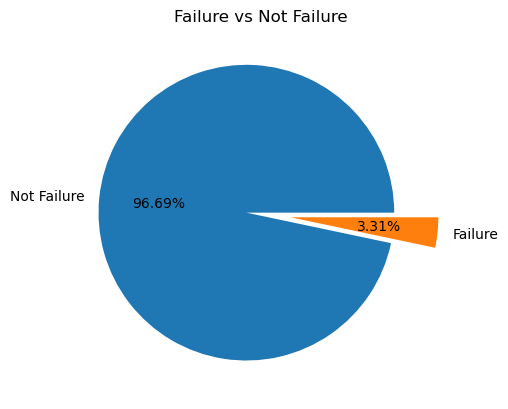

In [31]:
plt.pie(df1["Target"].value_counts(),explode=[0.1,0.2],labels=["Not Failure","Failure"],autopct="%1.2f%%")
plt.title("Failure vs Not Failure")
plt.show()

Text(0.5, 1.0, 'Product quality type supply')

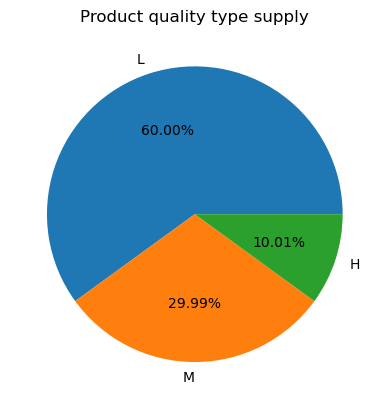

In [32]:
plt.pie(df1["Type"].value_counts(),labels=["L","M","H"],autopct="%1.2f%%")
plt.title("Product quality type supply")

In [33]:
#lets see the percentage of product failure wrt quality type

Text(0.5, 1.0, 'performance of Quality L product')

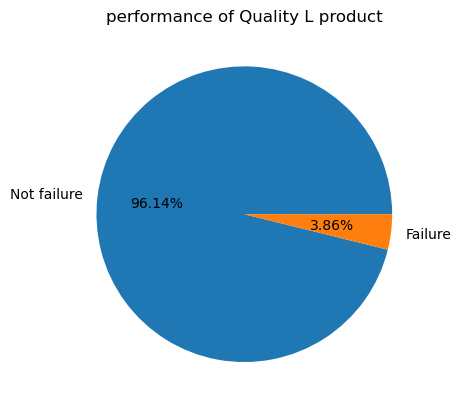

In [34]:
df_product_quality=df1[df1["Type"]=="L"]
plt.pie(df_product_quality["Target"].value_counts(),labels=["Not failure","Failure"],autopct="%1.2f%%")
plt.title("performance of Quality L product")

Text(0.5, 1.0, 'performance of Quality M product')

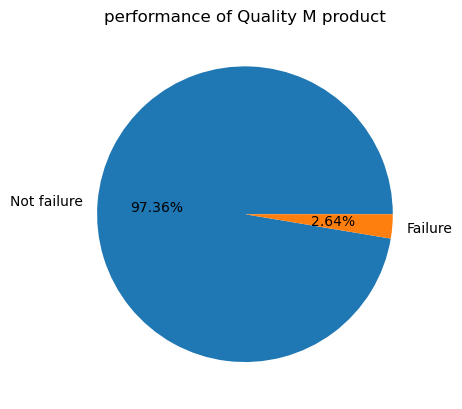

In [35]:
df_product_quality=df1[df1["Type"]=="M"]
plt.pie(df_product_quality["Target"].value_counts(),labels=["Not failure","Failure"],autopct="%1.2f%%")
plt.title("performance of Quality M product")

Text(0.5, 1.0, 'performance of Quality H product')

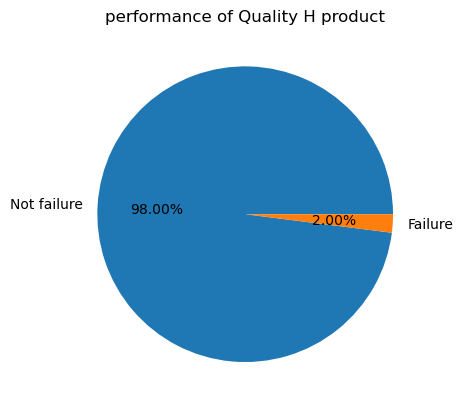

In [36]:
df_product_quality=df1[df1["Type"]=="H"]
plt.pie(df_product_quality["Target"].value_counts(),labels=["Not failure","Failure"],autopct="%1.2f%%")
plt.title("performance of Quality H product")

Text(0.5, 1.0, 'performance of Quality H product')

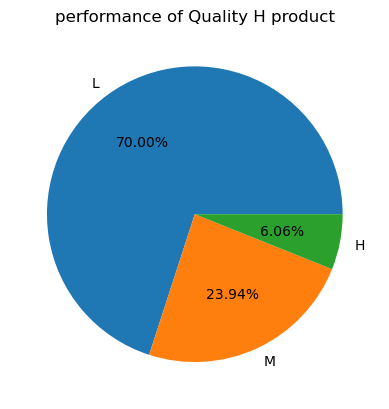

In [37]:
df_failure=df1[df1["Target"]==1]
plt.pie(df_failure["Type"].value_counts(),labels=["L","M","H"],autopct="%1.2f%%")
plt.title("performance of Quality H product")

In [38]:
# The difference in failure margin among Quality L , M, H  Is just around 1 to 1.5 %,
#so we can say that the quality of the product has very less effect on failure cases.
# All quality product has an an average same percentage of failure cases.

In [39]:
df1["Failure Type"].value_counts()

No Failure                  9643
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: Failure Type, dtype: int64

Text(0.5, 1.0, 'Failure percentage as per failure type')

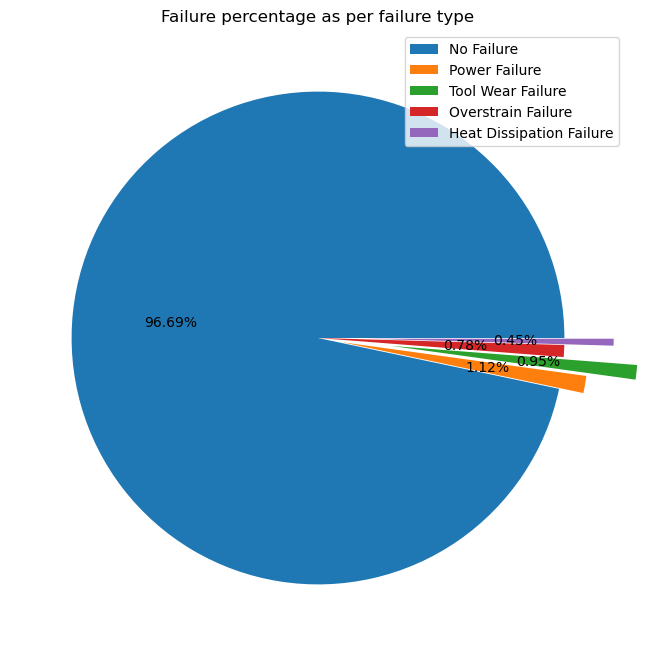

In [40]:
plt.figure(figsize=(10,8))
failure_type=df1["Failure Type"].unique().tolist() # different types of failure
plt.pie(df1["Failure Type"].value_counts(),autopct="%1.2f%%",explode=(0.00,0.1,0.3,0.0,0.2))
plt.legend(failure_type)
plt.title("Failure percentage as per failure type")

In [41]:
# lets examine the effect of Rotational speed and torque on the failure types

<AxesSubplot:xlabel='speed', ylabel='torque'>

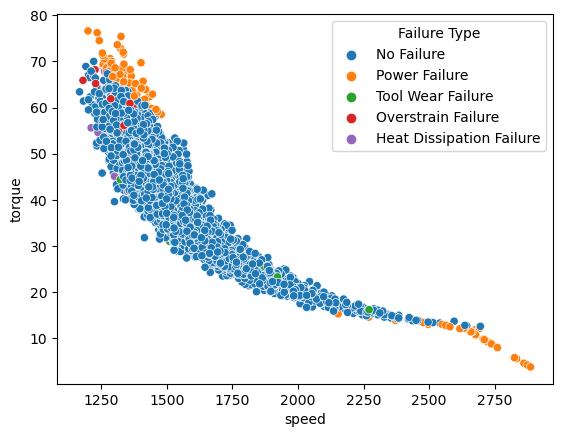

In [42]:
sns.scatterplot(data=df1,x="speed",y="torque",hue="Failure Type")

<AxesSubplot:xlabel='speed', ylabel='torque'>

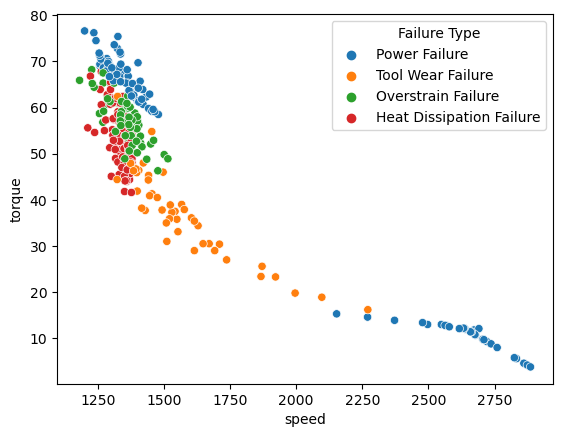

In [43]:
sns.scatterplot(data=df1[df1["Target"]==1],x="speed",y="torque",hue="Failure Type")

{'whiskers': [<matplotlib.lines.Line2D at 0x28abb2e8790>,
 'caps': [<matplotlib.lines.Line2D at 0x28abb2e8d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x28abb2e8490>],
 'medians': [<matplotlib.lines.Line2D at 0x28abb2fa310>],
 'fliers': [<matplotlib.lines.Line2D at 0x28abb2fa5e0>],
 'means': []}

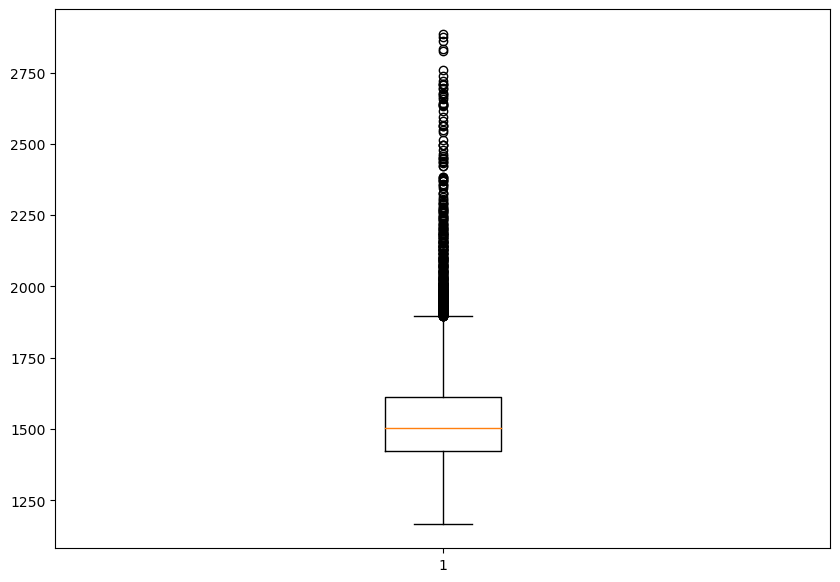

In [44]:
plt.figure(figsize =(10, 7))
plt.boxplot(data=df1, x='speed')

{'whiskers': [<matplotlib.lines.Line2D at 0x28abb388e50>,
 'caps': [<matplotlib.lines.Line2D at 0x28abb39b430>,
 'boxes': [<matplotlib.lines.Line2D at 0x28abb388b80>],
 'medians': [<matplotlib.lines.Line2D at 0x28abb39b9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28abb39bca0>],
 'means': []}

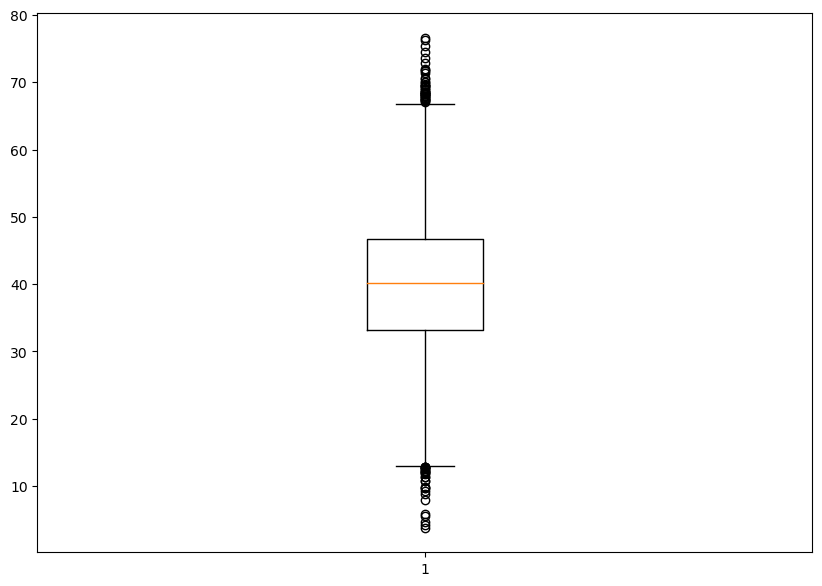

In [45]:
plt.figure(figsize =(10, 7))
plt.boxplot(data=df1, x='torque')

<AxesSubplot:>

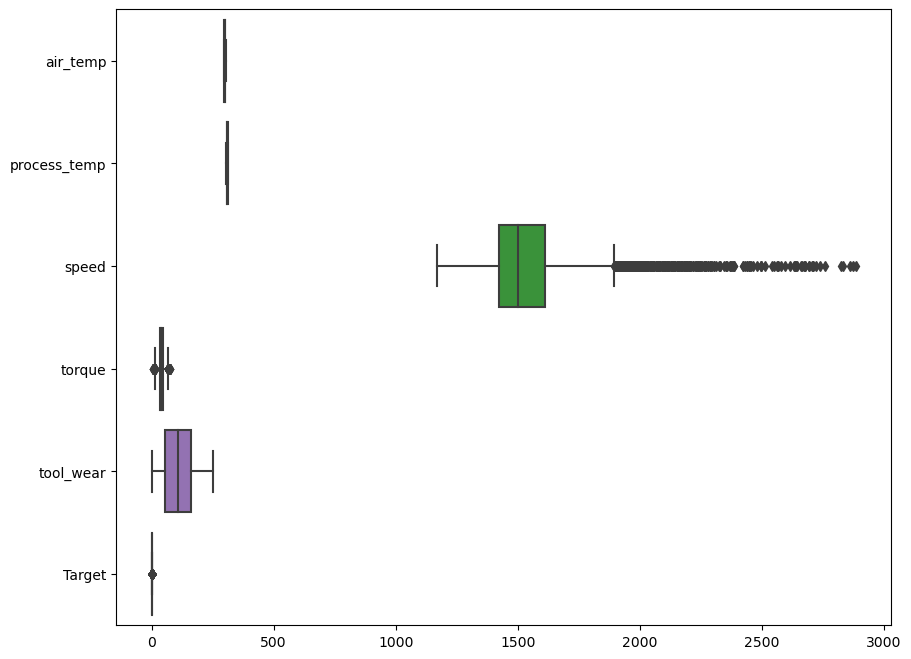

In [46]:
plt.figure(figsize =(10, 8))
sns.boxplot(data =df1,orient="h")

In [47]:
# significant outlier in speed and torque

<AxesSubplot:xlabel='torque', ylabel='Count'>

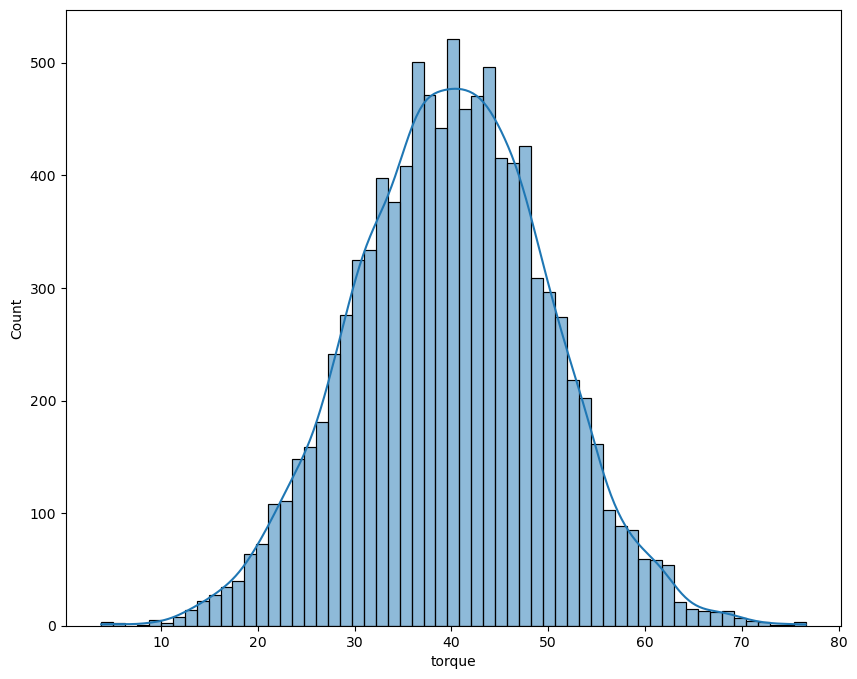

In [48]:
plt.figure(figsize =(10, 8))
sns.histplot(data =df1, x='torque',kde=True)

In [49]:
# torque is normally distributed 

<AxesSubplot:xlabel='speed', ylabel='Count'>

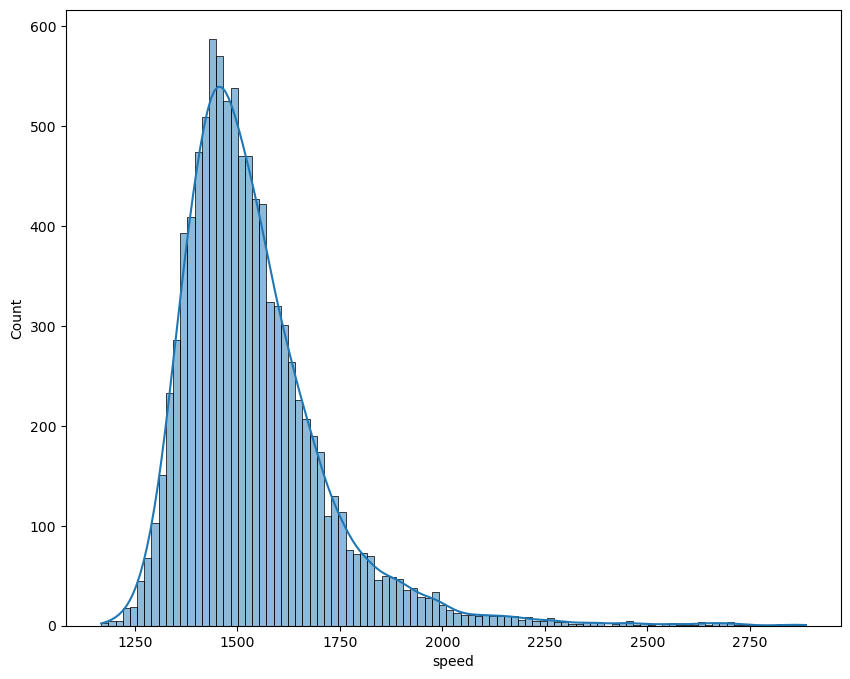

In [50]:
plt.figure(figsize =(10, 8))
sns.histplot(data =df1, x='speed',kde=True)

In [51]:
# speed is skewed to the right

In [52]:
df1["Failure Type"]=df1["Failure Type"].map({"No Failure":0,"Heat Dissipation Failure":1,"Power Failure":2,"Overstrain Failure":3,"Tool Wear Failure":4})

In [53]:
df1['Failure Type'].value_counts()

0    9643
1     112
2      95
3      78
4      45
Name: Failure Type, dtype: int64

In [54]:
# we can see above the data is xtremenly unbalanced. 97% no failure and only 3% failure cases. 

In [55]:
df1["Type"]=df1["Type"].map({"L":0,"M":1,"H":2})

In [56]:
df1

,Type,air_temp,process_temp,speed,torque,tool_wear,Target,Failure Type
0,1,298.1,308.6,1551,42.8,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0
2,0,298.1,308.5,1498,49.4,5,0,0
3,0,298.2,308.6,1433,39.5,7,0,0
4,0,298.2,308.7,1408,40.0,9,0,0
...,...,...,...,...,...,...,...,...
9968,1,298.8,308.4,1604,29.5,14,0,0
9969,2,298.9,308.4,1632,31.8,17,0,0
9970,1,299.0,308.6,1645,33.4,22,0,0
9971,2,299.0,308.7,1408,48.5,25,0,0


In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9973 entries, 0 to 9972
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          9973 non-null   int64  
 1   air_temp      9973 non-null   float64
 2   process_temp  9973 non-null   float64
 3   speed         9973 non-null   int64  
 4   torque        9973 non-null   float64
 5   tool_wear     9973 non-null   int64  
 6   Target        9973 non-null   int64  
 7   Failure Type  9973 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 623.4 KB


In [58]:
df1.to_csv('final_dataset.csv', index = False)